In [1]:
%matplotlib inline
from collections import Counter
import douwelib as dl
import os, glob, statistics, numpy as np, matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
sequence_file = 'C:/Users/Douwe/Documents/Python/Sequence_files/COG_LAB008_20170217_FNFAF05255_MN17942_sequencing_run_RCA_Pool_2_1D_16122_ch90_read1116_strand.done_fastq'


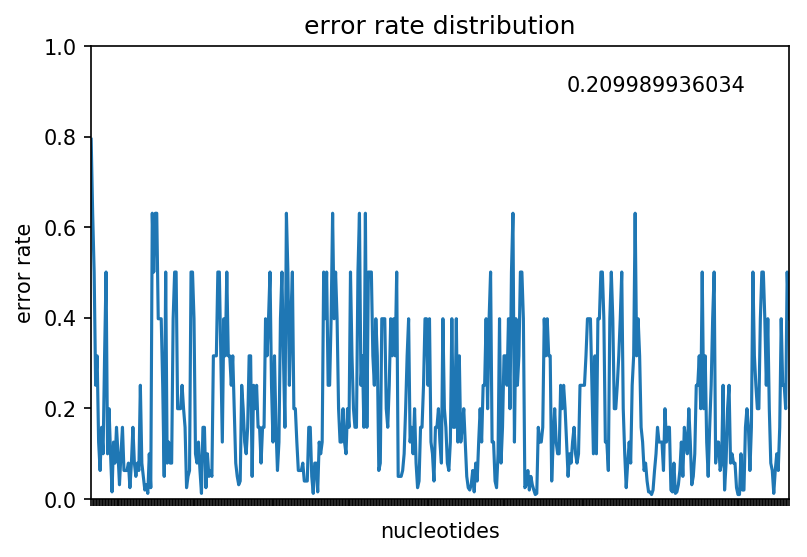

In [3]:
data = dl.parse_fasta_file_error(sequence_file)          #reads sequence_file -> makes dictonairy with key = id and value = bases and scores
#print(data)
                                                         
id_ = list(data.keys())[0]                               #makes name id_ from key
error_rate = dl.convert_qualityscore (data[id_]['score']) #converts quality score from symboles to values out of dict

nucleotides_list = [c for c in (data[id_]['sequence'])]  #individualize nucleotides into list out of dict
X = np.array(nucleotides_list)                           #array for nucleotides and error rate
Y = np.array(error_rate)                                 

dl.plot_error_rate(X, Y)

In [ ]:
# All in one button
pp = PdfPages('joe.pdf')
ax = dl.plot_done_fastq_files(sequence_file)
pp.savefig(ax)
pp.close()

In [ ]:
#Creat dictonairy for test_.py
dictonairy_test = dict(zip(nucleotides_list, error_rate))
print(dictonairy_test)

In [ ]:
for k,v in data.items():
    print(k)
    for k_, v_ in v.items():
        print(k_, v_)

In [ ]:
def plot_error_rate(x,y):
    plt.style.use("ggplot")
    plt.figure(dpi=100)
    plt.scatter(x,y)
    plt.axis([0, 500, 0.00000, 1.00000]
    plt.show()

In [ ]:
os.chdir('C:/Users/Douwe/Documents/Python/Sequence_files')
for file in glob.iglob('*.done_fastq'):
    print(file)

In [ ]:
s = 'AAAAAgAAA'
def check(s):
    for l in set(s.upper()):
        if not l in 'ACTGN':
            return False
    return True

assert check(s) == True

In [ ]:
set('CGACGACGACAGCACGAC')

In [ ]:
meanscore_ = statistics.mean(error_rate)                 #meanscore of the error rate